## IMDB analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from stargazer.stargazer import Stargazer, LineLocation
import statsmodels.formula.api as smf 
from sklearn.linear_model import LogisticRegression 


In [2]:
imdb_df = pd.read_csv('imdb.csv')
imdb_df

,name,length(minutes),genre,rating_10_scale,metascore_100_scale,vote number,us/canada gross(USD/Million),budget(USD/Million),opening week gross(USD/Million),gross world wide(USD/Million)
0,Spider-Man: Far from Home,129,"Action, Adventure, Sci-Fi",7.4,69.0,414434,390.53,160.0,92.579212,1131.927996
1,Avengers: Endgame,181,"Action, Adventure, Drama",8.4,78.0,981756,858.37,356.0,357.115007,2797.501328
2,Klaus,96,"Animation, Adventure, Comedy",8.2,65.0,132425,NaN,40.0,NaN,NaN
3,Last Christmas,103,"Comedy, Drama, Fantasy",6.5,50.0,71509,NaN,25.0,11.441055,121.550750
4,Little Women,135,"Drama, Romance",7.8,91.0,176347,108.10,40.0,16.755310,216.601214
...,...,...,...,...,...,...,...,...,...,...
495,The Hole in the Ground,90,"Drama, Horror, Mystery",5.7,63.0,17820,0.02,NaN,NaN,3.373474
496,Skyfire,97,"Action, Adventure, Drama",5.2,52.0,2667,NaN,NaN,0.000861,24.444590
497,Overcomer,119,"Drama, Family, Sport",6.7,17.0,4559,26.25,5.0,8.146533,38.026103
498,Dveselu putenis,104,"Drama, History, War",7.4,63.0,3822,NaN,NaN,NaN,0.008750


In [3]:
# classify movies length type in to short, normal and long movie
imdb_df.loc[imdb_df['length(minutes)'] < 90, 'movie_length_type'] = 'short'
imdb_df.loc[(imdb_df['length(minutes)'] >= 90) & (imdb_df['length(minutes)'] <= 120) , 'movie_length_type'] = 'normal'
imdb_df.loc[imdb_df['length(minutes)'] >120 , 'movie_length_type'] = 'long'

In [4]:
# rename the columns into proper format
imdb_df = imdb_df.rename(columns={
    'length(minutes)': 'length_min', 
    'vote number': 'vote_number_thousand',
    'us/canada gross(USD/Million)': 'US_Canada_gross_USD_Million',
    'budget(USD/Million)':'budget_USD_Million',
    'opening week gross(USD/Million)':'opening_week_gross_USD_Million',
    'gross world wide(USD/Million)':'gross_world_USD_Million'
    })

In [5]:
# define binary score variable: rating score higher than 7 is considered high score, less than 7 is considered low score
imdb_df.loc[imdb_df['rating_10_scale'] >= 7, 'High_low_score'] = 1
imdb_df.loc[imdb_df['rating_10_scale'] < 7, 'High_low_score'] = 0
imdb_df['High_low_score'] = [int(x) for x in imdb_df['High_low_score']]

In [6]:
# turn the unit of vote number in to thousand
imdb_df['vote_number_thousand'] = [x/1000 for x in imdb_df['vote_number_thousand']]

In [7]:
imdb_df

,name,length_min,genre,rating_10_scale,metascore_100_scale,vote_number_thousand,US_Canada_gross_USD_Million,budget_USD_Million,opening_week_gross_USD_Million,gross_world_USD_Million,movie_length_type,High_low_score
0,Spider-Man: Far from Home,129,"Action, Adventure, Sci-Fi",7.4,69.0,414.434,390.53,160.0,92.579212,1131.927996,long,1
1,Avengers: Endgame,181,"Action, Adventure, Drama",8.4,78.0,981.756,858.37,356.0,357.115007,2797.501328,long,1
2,Klaus,96,"Animation, Adventure, Comedy",8.2,65.0,132.425,NaN,40.0,NaN,NaN,normal,1
3,Last Christmas,103,"Comedy, Drama, Fantasy",6.5,50.0,71.509,NaN,25.0,11.441055,121.550750,normal,0
4,Little Women,135,"Drama, Romance",7.8,91.0,176.347,108.10,40.0,16.755310,216.601214,long,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,The Hole in the Ground,90,"Drama, Horror, Mystery",5.7,63.0,17.820,0.02,NaN,NaN,3.373474,normal,0
496,Skyfire,97,"Action, Adventure, Drama",5.2,52.0,2.667,NaN,NaN,0.000861,24.444590,normal,0
497,Overcomer,119,"Drama, Family, Sport",6.7,17.0,4.559,26.25,5.0,8.146533,38.026103,normal,0
498,Dveselu putenis,104,"Drama, History, War",7.4,63.0,3.822,NaN,NaN,NaN,0.008750,normal,1


### Data visualization

`histplot - rating`

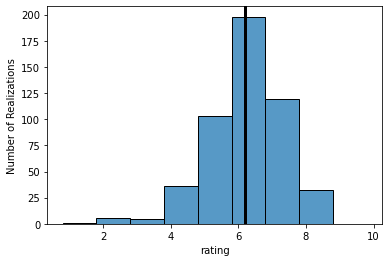

In [8]:
ax = sns.histplot(x=imdb_df['rating_10_scale'],discrete=True)
ax.set(xlabel='rating', ylabel='Number of Realizations')
ax.axvline(imdb_df['rating_10_scale'].mean(),color='black',linewidth=3)

`histplot - metascore`

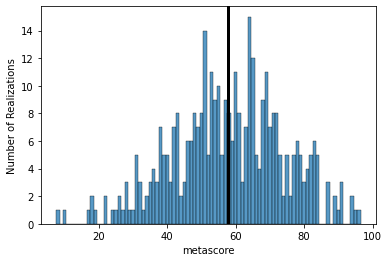

In [9]:
ax = sns.histplot(x=imdb_df['metascore_100_scale'],discrete=True)
ax.set(xlabel='metascore', ylabel='Number of Realizations')
ax.axvline(imdb_df['metascore_100_scale'].mean(),color='black',linewidth=3)

In [10]:
imdb_NorthAmerica_gross_exist = imdb_df.loc[pd.isna(imdb_df['US_Canada_gross_USD_Million']) == False]
imdb_NorthAmerica_gross_exist

,name,length_min,genre,rating_10_scale,metascore_100_scale,vote_number_thousand,US_Canada_gross_USD_Million,budget_USD_Million,opening_week_gross_USD_Million,gross_world_USD_Million,movie_length_type,High_low_score
0,Spider-Man: Far from Home,129,"Action, Adventure, Sci-Fi",7.4,69.0,414.434,390.53,160.0,92.579212,1131.927996,long,1
1,Avengers: Endgame,181,"Action, Adventure, Drama",8.4,78.0,981.756,858.37,356.0,357.115007,2797.501328,long,1
4,Little Women,135,"Drama, Romance",7.8,91.0,176.347,108.10,40.0,16.755310,216.601214,long,1
5,The Lighthouse,109,"Drama, Fantasy, Horror",7.5,83.0,181.100,0.43,11.0,0.427797,18.124206,normal,1
6,Midsommar,148,"Drama, Horror, Mystery",7.1,72.0,268.146,27.33,9.0,6.560030,47.967636,long,1
...,...,...,...,...,...,...,...,...,...,...,...,...
450,Them That Follow,98,"Drama, Thriller",5.4,57.0,3.211,0.16,NaN,0.013137,0.172952,normal,0
457,The Prodigy,92,"Fantasy, Horror, Mystery",5.9,45.0,25.529,14.86,6.0,5.853061,21.127789,normal,0
458,The Mustang,96,Drama,6.9,77.0,12.009,5.04,NaN,0.071657,6.405816,normal,0
495,The Hole in the Ground,90,"Drama, Horror, Mystery",5.7,63.0,17.820,0.02,NaN,NaN,3.373474,normal,0


`histplot - US/Canada box office`

[Text(0.5, 0, 'US/Canada box office'), Text(0, 0.5, 'Number of Realizations')]

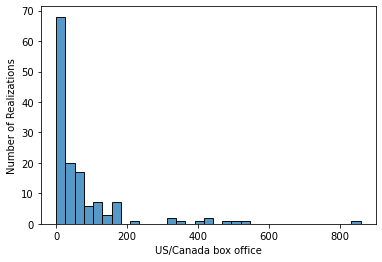

In [11]:
ax = sns.histplot(x=imdb_NorthAmerica_gross_exist['US_Canada_gross_USD_Million'])
ax.set(xlabel='US/Canada box office', ylabel='Number of Realizations')

In [12]:
imdb_worldwide_gross_exist = imdb_df.loc[pd.isna(imdb_df['gross_world_USD_Million']) == False]
imdb_worldwide_gross_exist

,name,length_min,genre,rating_10_scale,metascore_100_scale,vote_number_thousand,US_Canada_gross_USD_Million,budget_USD_Million,opening_week_gross_USD_Million,gross_world_USD_Million,movie_length_type,High_low_score
0,Spider-Man: Far from Home,129,"Action, Adventure, Sci-Fi",7.4,69.0,414.434,390.53,160.000000,92.579212,1131.927996,long,1
1,Avengers: Endgame,181,"Action, Adventure, Drama",8.4,78.0,981.756,858.37,356.000000,357.115007,2797.501328,long,1
3,Last Christmas,103,"Comedy, Drama, Fantasy",6.5,50.0,71.509,NaN,25.000000,11.441055,121.550750,normal,0
4,Little Women,135,"Drama, Romance",7.8,91.0,176.347,108.10,40.000000,16.755310,216.601214,long,1
5,The Lighthouse,109,"Drama, Fantasy, Horror",7.5,83.0,181.100,0.43,11.000000,0.427797,18.124206,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...
494,Balkanskiy rubezh,130,"Action, War",6.6,NaN,9.450,NaN,3.555583,NaN,5.849400,long,0
495,The Hole in the Ground,90,"Drama, Horror, Mystery",5.7,63.0,17.820,0.02,NaN,NaN,3.373474,normal,0
496,Skyfire,97,"Action, Adventure, Drama",5.2,52.0,2.667,NaN,NaN,0.000861,24.444590,normal,0
497,Overcomer,119,"Drama, Family, Sport",6.7,17.0,4.559,26.25,5.000000,8.146533,38.026103,normal,0


`histplot - world box office`

[Text(0.5, 0, 'world-wide box office'), Text(0, 0.5, 'Number of Realizations')]

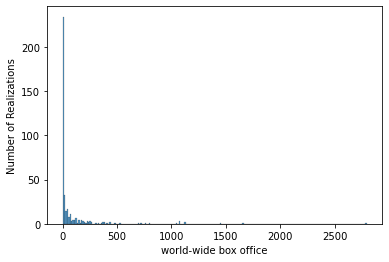

In [13]:
ax = sns.histplot(x=imdb_worldwide_gross_exist['gross_world_USD_Million'])
ax.set(xlabel='world-wide box office', ylabel='Number of Realizations')

[Text(0.5, 0, 'world wide box office < 500'),
 Text(0, 0.5, 'Number of Realizations')]

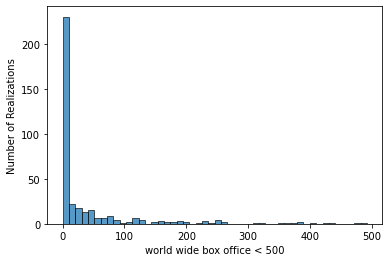

In [14]:
#look detailedly in world box office under 500 million which most data locate

ax = sns.histplot(x=imdb_worldwide_gross_exist.loc[imdb_worldwide_gross_exist['gross_world_USD_Million'] 
                                                   < 500]['gross_world_USD_Million'])
ax.set(xlabel='world wide box office < 500', ylabel='Number of Realizations')

`histplot - high/low score`

[Text(0.5, 0, 'low/high score'), Text(0, 0.5, 'Number of Realizations')]

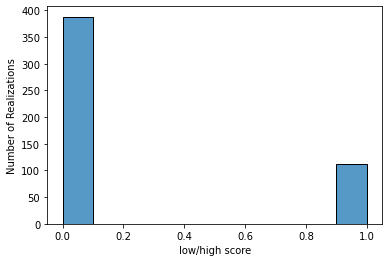

In [15]:
ax = sns.histplot(x=imdb_df['High_low_score'])
ax.set(xlabel='low/high score', ylabel='Number of Realizations')

`scatterplot - rating , world box office`

[Text(0.5, 0, 'rating'), Text(0, 0.5, 'world box office')]

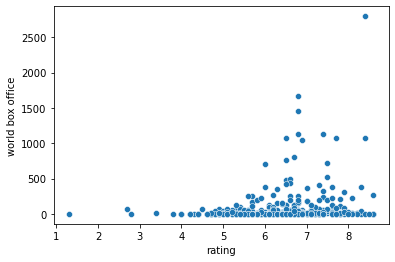

In [16]:
ax = sns.scatterplot(data = imdb_df, x='rating_10_scale', y='gross_world_USD_Million')
ax.set(xlabel='rating', ylabel='world box office')

[Text(0.5, 0, 'rating'), Text(0, 0.5, 'world box office')]

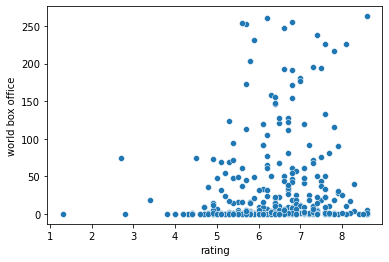

In [17]:
#look detailedly in world box office under 300 million which most data locate

ax = sns.scatterplot(data = imdb_df.loc[imdb_df['gross_world_USD_Million'] <= 300], 
                     x='rating_10_scale', y='gross_world_USD_Million')
ax.set(xlabel='rating', ylabel='world box office')

`scatterplot - budget , US/Canada box office`

[Text(0.5, 0, 'budge'), Text(0, 0.5, 'US/Canada box office')]

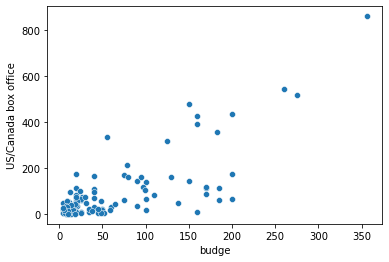

In [18]:
ax = sns.scatterplot(data = imdb_df, x='budget_USD_Million', y='US_Canada_gross_USD_Million')
ax.set(xlabel='budge', ylabel='US/Canada box office')

`scatterplot - budget , world box office`

[Text(0.5, 0, 'budge'), Text(0, 0.5, 'world box office')]

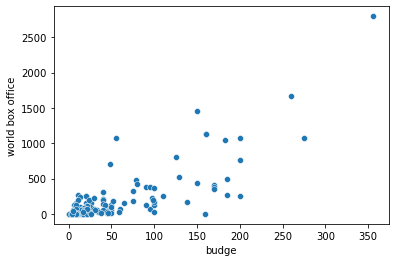

In [19]:
ax = sns.scatterplot(data = imdb_df, x='budget_USD_Million', y='gross_world_USD_Million')
ax.set(xlabel='budge', ylabel='world box office')

### Regression analysis

#### (1) Linear regression

##### *single predictor*

1. `US/Canada gross box office - rating`

In [20]:
box_office_est = ols('US_Canada_gross_USD_Million~rating_10_scale',data=imdb_NorthAmerica_gross_exist).fit() 
box_office_est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-168.5134,79.227,-2.127,0.035,-325.180,-11.847
rating_10_scale,36.6000,11.910,3.073,0.003,13.049,60.151


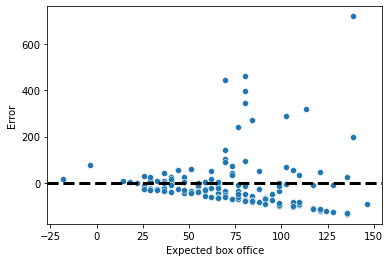

In [21]:
#use residual plot to test the assumption 𝑆𝐷(𝜖𝑖)=𝜎

ax = sns.scatterplot(x=box_office_est.predict(),y=box_office_est.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected box office',ylabel='Error');

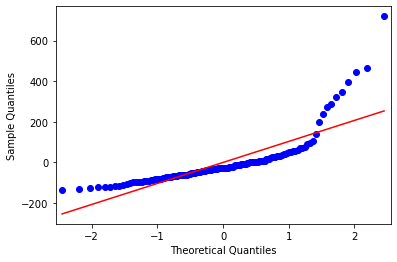

In [22]:
#use qqplot to test whether error 𝜖𝑖 are normally distributed

sm.qqplot(box_office_est.resid,line='r');  #add ; to turn two into one

In [23]:
box_office_robust = box_office_est.get_robustcov_results(cov_type='HC3') 
box_office_robust.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-168.5134,94.968,-1.774,0.078,-356.306,19.279
rating_10_scale,36.6000,15.473,2.365,0.019,6.004,67.196


Here I study the correlation between US/Canada box office and 10-scale rating. First I make a normal ols and found that the coefficient is significant. Second, I make a residual plot and qqplot to diagnose whether the model comply with the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed. Based on the plots, we can see that: 1) when the expected box office 𝐸(𝑌𝑖) are smaller, the estimated errors tend to become more smaller in magnitude; 2) the estimated error doesn't lie on the straight line in qqplot. Therefore, the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed is problematic, and I choose to use robust 95% confidence interval to modify the original model. Third, from the robust result we can know that the effect of rating on US/Canada box office is significant. The coefficient 36.6 represnets that when the rating is one unit higher, the expected box office in US/Canada will increase 36.6 million US dollars. The true effect of rating on US/Canada box office has 95% probability to be between 6.004 and 67.196.

2. `world gross box office - rating`

In [24]:
box_office_est1 = ols('gross_world_USD_Million~rating_10_scale',data=imdb_worldwide_gross_exist).fit() 
box_office_est1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-225.6017,76.129,-2.963,0.003,-375.283,-75.920
rating_10_scale,48.2545,11.806,4.087,0.000,25.043,71.466


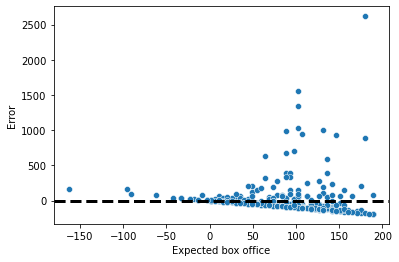

In [25]:
ax = sns.scatterplot(x=box_office_est1.predict(),y=box_office_est1.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected box office',ylabel='Error');

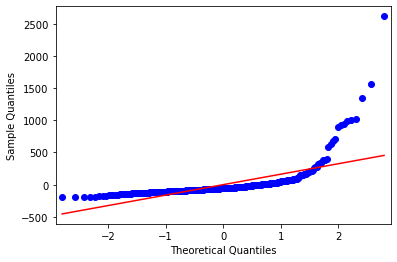

In [26]:
sm.qqplot(box_office_est1.resid,line='r');

In [27]:
box_office_robust1 = box_office_est1.get_robustcov_results(cov_type='HC3') 
box_office_robust1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-225.6017,90.754,-2.486,0.013,-404.039,-47.165
rating_10_scale,48.2545,15.684,3.077,0.002,17.417,79.092


Here I study the correlation between world box office and 10-scale rating. First I make a normal ols and found that the coefficient is significant. Second, I make a residual plot and qqplot to diagnose whether the model comply with the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed. Based on the plots, we can see that: 1) when the expected box office 𝐸(𝑌𝑖) are smaller, the estimated errors tend to become more smaller in magnitude, and the errors are highly dispersed; 2) the estimated error doesn't lie on the straight line in qqplot. Therefore, the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed is problematic, and I choose to use robust 95% confidence interval to modify the original model. Third, from the robust result we can know that the effect of rating on world box office is significant. The coefficient 48.2545 represnets that when the rating is one unit higher, the expected box office in the whole world will increase 48.2545 million US dollars. The true effect of rating on world box office has 95% probability to be between 17.417 and 79.092.

3. `world gross box office - budget`

In [28]:
world_budget_exist = imdb_worldwide_gross_exist.loc[pd.isna(imdb_worldwide_gross_exist['budget_USD_Million'])==False]
box_office_est2 = ols('gross_world_USD_Million~budget_USD_Million',data=world_budget_exist).fit() 
box_office_est2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-34.5377,18.103,-1.908,0.058,-70.256,1.180
budget_USD_Million,4.5537,0.251,18.159,0.000,4.059,5.048


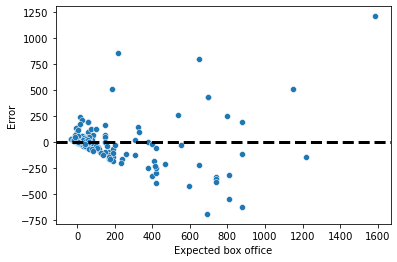

In [29]:
ax = sns.scatterplot(x=box_office_est2.predict(),y=box_office_est2.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected box office',ylabel='Error');

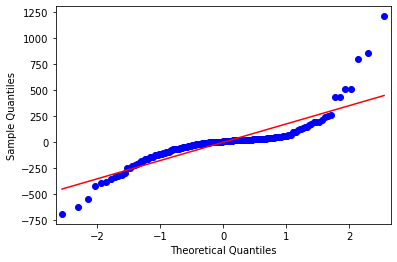

In [30]:
sm.qqplot(box_office_est2.resid,line='r');

In [31]:
box_office_robust2 = box_office_est2.get_robustcov_results(cov_type='HC3') 
box_office_robust2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-34.5377,24.990,-1.382,0.169,-83.844,14.769
budget_USD_Million,4.5537,0.829,5.491,0.000,2.917,6.190


Here I study the correlation between world box office and movie budget. First I make a normal ols and found that the coefficient is significant. Second, I make a residual plot and qqplot to diagnose whether the model comply with the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed. Based on the plots, we can see that: 1) when the expected box office 𝐸(𝑌𝑖) are smaller, the estimated errors tend to become more smaller in magnitude; 2) the estimated error doesn't lie on the straight line in qqplot. Therefore, the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed is problematic, and I choose to use robust 95% confidence interval to modify the original model. Third, from the robust result we can know that the effect of budget on world box office is significant. The coefficient 4.5537 represnets that when the budget is one million US dollars higher, the expected box office in the whole world will increase 4.5537 million US dollars. The true effect of rating on world box office has 95% probability to be between 2.917 and 6.19.

##### *Multiple predictors*

In [32]:
imdb_df_clean = imdb_df.dropna()
imdb_df_clean

,name,length_min,genre,rating_10_scale,metascore_100_scale,vote_number_thousand,US_Canada_gross_USD_Million,budget_USD_Million,opening_week_gross_USD_Million,gross_world_USD_Million,movie_length_type,High_low_score
0,Spider-Man: Far from Home,129,"Action, Adventure, Sci-Fi",7.4,69.0,414.434,390.53,160.0,92.579212,1131.927996,long,1
1,Avengers: Endgame,181,"Action, Adventure, Drama",8.4,78.0,981.756,858.37,356.0,357.115007,2797.501328,long,1
4,Little Women,135,"Drama, Romance",7.8,91.0,176.347,108.10,40.0,16.755310,216.601214,long,1
5,The Lighthouse,109,"Drama, Fantasy, Horror",7.5,83.0,181.100,0.43,11.0,0.427797,18.124206,normal,1
6,Midsommar,148,"Drama, Horror, Mystery",7.1,72.0,268.146,27.33,9.0,6.560030,47.967636,long,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,Triple Threat,96,"Action, Thriller",5.6,60.0,10.884,0.08,10.0,0.005936,0.345900,normal,0
390,A Madea Family Funeral,109,"Comedy, Drama",4.5,39.0,4.244,73.26,20.0,27.062332,74.747725,normal,0
448,Mysteriet om hr. Link,93,"Animation, Adventure, Comedy",6.7,68.0,24.657,16.65,100.0,5.944950,26.565710,normal,0
457,The Prodigy,92,"Fantasy, Horror, Mystery",5.9,45.0,25.529,14.86,6.0,5.853061,21.127789,normal,0


1. `world box office - rating + budget + opening week box office`

In [33]:
box_office_est3 = ols('gross_world_USD_Million~rating_10_scale+budget_USD_Million \
                      +opening_week_gross_USD_Million',data=imdb_df_clean).fit() 
box_office_est3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-390.4230,99.614,-3.919,0.000,-587.961,-192.885
rating_10_scale,59.3583,15.352,3.866,0.000,28.914,89.803
budget_USD_Million,0.9997,0.279,3.580,0.001,0.446,1.554
opening_week_gross_USD_Million,6.6242,0.407,16.267,0.000,5.817,7.432


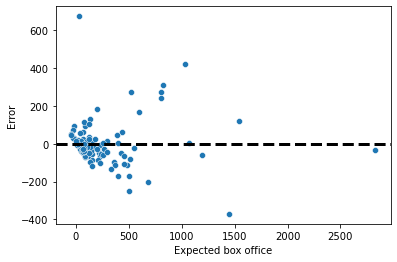

In [34]:
ax = sns.scatterplot(x=box_office_est3.predict(),y=box_office_est3.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected box office',ylabel='Error');

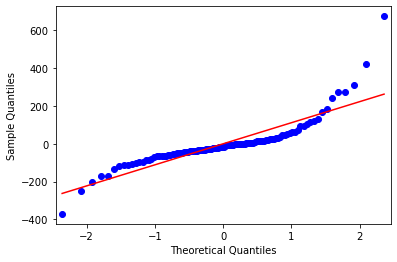

In [35]:
sm.qqplot(box_office_est3.resid,line='r');

In [36]:
box_office_robust3 = box_office_est3.get_robustcov_results(cov_type='HC3') 
box_office_robust3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-390.4230,91.091,-4.286,0.000,-571.060,-209.786
rating_10_scale,59.3583,14.677,4.044,0.000,30.254,88.463
budget_USD_Million,0.9997,0.313,3.190,0.002,0.378,1.621
opening_week_gross_USD_Million,6.6242,0.507,13.056,0.000,5.618,7.630


Here I study the correlation between world box office and rating, budget and opening week box office. First I make a normal ols and found that all coefficients are significant. Second, I make a residual plot and qqplot to diagnose whether the model comply with the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed. Based on the plots, we can see that: 1) when the expected box office 𝐸(𝑌𝑖) are smaller, the estimated errors tend to become more smaller in magnitude; 2) the estimated error doesn't lie on the straight line in qqplot. Therefore, the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed is problematic, and I choose to use robust 95% confidence interval to modify the original model. 

Third, from the robust result we can know that the effects of rating, budget and opening week box office on world box office are significant. The coefficient 59.3583 represents that when budget and opening week box office are controlled for, if the rating is one unit higher, the expected box office in the world will increase 59.3583 million US dollars. The coefficient 0.9997 represnets that when rating and opening week box office are controlled for, if the budget is one million US dollars higher, the expected box office in the world will increase 0.9997 million US dollars. The coefficient 6.6242 represnets that when budget and rating are controlled for, if the opening week box office is one million US dollars higher, the expected box office in the world will increase 6.6242 million US dollars.

#### (2) Logistic regression

In [37]:
budget_clean = imdb_df.loc[pd.isna(imdb_df['budget_USD_Million']) == False]
budget_clean

,name,length_min,genre,rating_10_scale,metascore_100_scale,vote_number_thousand,US_Canada_gross_USD_Million,budget_USD_Million,opening_week_gross_USD_Million,gross_world_USD_Million,movie_length_type,High_low_score
0,Spider-Man: Far from Home,129,"Action, Adventure, Sci-Fi",7.4,69.0,414.434,390.53,160.000000,92.579212,1131.927996,long,1
1,Avengers: Endgame,181,"Action, Adventure, Drama",8.4,78.0,981.756,858.37,356.000000,357.115007,2797.501328,long,1
2,Klaus,96,"Animation, Adventure, Comedy",8.2,65.0,132.425,NaN,40.000000,NaN,NaN,normal,1
3,Last Christmas,103,"Comedy, Drama, Fantasy",6.5,50.0,71.509,NaN,25.000000,11.441055,121.550750,normal,0
4,Little Women,135,"Drama, Romance",7.8,91.0,176.347,108.10,40.000000,16.755310,216.601214,long,1
...,...,...,...,...,...,...,...,...,...,...,...,...
484,Deathcember,145,"Comedy, Horror",4.5,NaN,0.617,NaN,0.167973,NaN,NaN,long,0
488,The Hard Way,92,Action,4.8,NaN,3.078,NaN,3.500000,NaN,NaN,normal,0
494,Balkanskiy rubezh,130,"Action, War",6.6,NaN,9.450,NaN,3.555583,NaN,5.849400,long,0
497,Overcomer,119,"Drama, Family, Sport",6.7,17.0,4.559,26.25,5.000000,8.146533,38.026103,normal,0


1. `binary score - budget`

In [38]:
rating_logit = smf.logit(formula='High_low_score ~ budget_USD_Million', data=budget_clean).fit() 
rating_logit.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.552098
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.2679,0.202,-6.282,0.000,-1.664,-0.872
budget_USD_Million,0.0032,0.003,1.211,0.226,-0.002,0.008


Here I study the correlation between binary variable score and budget. Based on the logistic regression result, the effect of budget on the high score odds *(high score probability/1-high score probability)* is not significant, as the p value is 0.226 which far exceeds 0.05.

2. `Binary score - vote number`

In [39]:
rating_logit1 = smf.logit(formula='High_low_score ~ vote_number_thousand', data=imdb_df).fit() 
rating_logit1.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.486165
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.6556,0.134,-12.345,0.000,-1.918,-1.393
vote_number_thousand,0.0079,0.001,5.437,0.000,0.005,0.011


Here I study the correlation between binary variable score and vote number. Based on the logistic regression result, the effect of vote number on the high score odds *(high score probability/1-high score probability)* is significant. The coefficient 0.0079 means that when vote number increase one unit(one thousand), the value of high score odds will increase $e^{0.0079}$=1.00793 multiple, revealing that the high score odds will increase 0.793%. The high score probability will be $[e^{-1.6556}/(e^{-1.6556}+1)]*[(e^{-1.6556+0.0079}+1)/e^{-1.6556+0.0079}]$ multiple of previous one. This true effect has 95% to be between 0.005 and 0.011.

#### (3) Ols regression with control variable

1. `world box office - opening week box office + binary score(control)`

In [40]:
#select high/low score binary variable as control variable

world_opening_control = imdb_df.loc[(pd.isna(imdb_df['opening_week_gross_USD_Million']) == False) &
                                  (pd.isna(imdb_df['gross_world_USD_Million']) == False)]
box_office_est4 = ols('gross_world_USD_Million~opening_week_gross_USD_Million+High_low_score',
                      data=world_opening_control).fit() 
box_office_est4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.1703,8.899,-0.132,0.895,-18.707,16.367
opening_week_gross_USD_Million,7.9977,0.196,40.836,0.000,7.612,8.384
High_low_score,53.4719,15.293,3.497,0.001,23.335,83.609


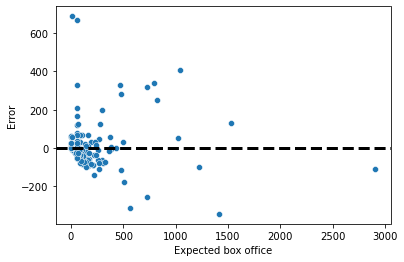

In [41]:
ax = sns.scatterplot(x=box_office_est4.predict(),y=box_office_est4.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected box office',ylabel='Error');

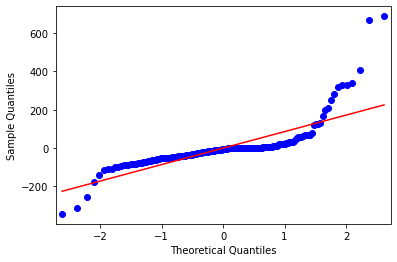

In [42]:
sm.qqplot(box_office_est4.resid,line='r');

In [43]:
box_office_robust4 = box_office_est4.get_robustcov_results(cov_type='HC3') 
box_office_robust4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.1703,7.108,-0.165,0.869,-15.177,12.836
opening_week_gross_USD_Million,7.9977,0.415,19.271,0.000,7.180,8.816
High_low_score,53.4719,17.397,3.074,0.002,19.189,87.755


Here I study the correlation between world box office and opening box office, with binary score as control variable. First I make a normal ols and found that all coefficients are significant. Second, I make a residual plot and qqplot to diagnose whether the model comply with the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed. Based on the plots, we can see that: 1) when the expected box office 𝐸(𝑌𝑖) are smaller, the estimated errors tend to become more smaller in magnitude, and the errors are dispersed; 2) the estimated error doesn't lie on the straight line in qqplot. Therefore, the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed is problematic, and I choose to use robust 95% confidence interval to modify the original model. 

Third, from the robust result we can know that the effects of opening week box office and score on world box office are significant. The coefficient 7.9977 represents that when the scores are low(under 7) or when the scores are controlled for, if the opening week box office is one million US dollars higher, the expected box office in the world will increase 7.9977 million US dollars. The coefficient 53.4719 represents that when the opening week box office is controlled for, the difference between expected world box office of high score movie and expected world box office of low score movie is 53.4719 million US dollars.

#### (4) Ols regression with control variable and interaction term

1. `world box office - opening week box office + binary score + opening week box office*binary score`

In [44]:
box_office_est5 = ols('gross_world_USD_Million~opening_week_gross_USD_Million+High_low_score+ \
                      opening_week_gross_USD_Million*High_low_score', data=world_opening_control).fit() 
box_office_est5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.1934,9.419,-0.127,0.899,-19.756,17.369
opening_week_gross_USD_Million,7.9993,0.288,27.736,0.000,7.431,8.568
High_low_score,53.5187,16.510,3.242,0.001,20.982,86.055
opening_week_gross_USD_Million:High_low_score,-0.0030,0.394,-0.008,0.994,-0.779,0.773


Here I study the correlation between world box office and opening week box office, binary score and the interaction term of opening week box office and score. Based on the ols result, the coefficients of opening week box office and score are significant, while the coefficient of interaction term is not significant. This means that binary score(high or low movie score) has no effect on the relationship between opening week box office and world box office.

2. `world box office - vote number + binary score + vote number*binary score`

In [45]:
box_office_est6 = ols('gross_world_USD_Million~vote_number_thousand+High_low_score+vote_number_thousand*High_low_score', 
                      data=imdb_worldwide_gross_exist).fit() 
box_office_est6.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-19.6249,11.397,-1.722,0.086,-42.034,2.784
vote_number_thousand,2.4785,0.165,15.024,0.000,2.154,2.803
High_low_score,10.1364,22.459,0.451,0.652,-34.022,54.295
vote_number_thousand:High_low_score,-1.2596,0.186,-6.778,0.000,-1.625,-0.894


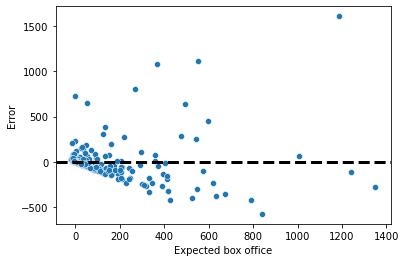

In [46]:
ax = sns.scatterplot(x=box_office_est6.predict(),y=box_office_est6.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected box office',ylabel='Error');

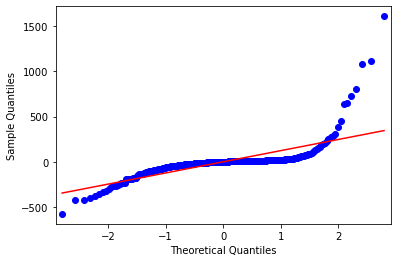

In [47]:
sm.qqplot(box_office_est6.resid,line='r');

In [48]:
box_office_robust6 = box_office_est6.get_robustcov_results(cov_type='HC3') 
box_office_robust6.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-19.6249,5.977,-3.284,0.001,-31.376,-7.874
vote_number_thousand,2.4785,0.328,7.559,0.000,1.834,3.123
High_low_score,10.1364,36.962,0.274,0.784,-62.539,82.812
vote_number_thousand:High_low_score,-1.2596,0.590,-2.134,0.034,-2.420,-0.099


Here I study the correlation between world box office and vote number, binary score and the interaction term of vote number and binary score. First I make a normal ols and found that coefficients of vote number and interaction term are significant, coefficient of score is not significant. Second, I make a residual plot and qqplot to diagnose whether the model comply with the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed. Based on the plots, we can see that: 1) when the expected box office 𝐸(𝑌𝑖) are smaller, the estimated errors tend to become more smaller in magnitude; 2) the estimated error doesn't lie on the straight line in qqplot. Therefore, the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed is problematic, and I choose to use robust 95% confidence interval to modify the original model.

Based on the robust result we can know that the coefficients of vote number and interaction term are significant, while the coefficient of binary score is not significant. This reveals that whether the score of movie is high(7 and above) and low(under 7) has effects on the relationship between vote number and world box office. The coefficient 2.4785 means that when the score of movie is low(under 7), one unit increase of vote number is associated with 2.4785 million US dollars increase in the world box office of the movie. The interaction coefficient -1.2596 means that when the movie socre is high, the effect of vote number on world box office will decrease 1.2596, from 2.4785 to 1.2189(2.4785-1.2596). Now one unit increase of vote number is associated with 1.2189 million US dollars increase in the world box office of the movie.

#### (5) Ols regression with non-binary categorical variable

In [49]:
box_office_est7 = ols('gross_world_USD_Million~C(movie_length_type)', data=imdb_worldwide_gross_exist).fit() 
box_office_est7.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,179.3931,25.098,7.148,0.000,130.047,228.739
C(movie_length_type)[T.normal],-124.2138,29.220,-4.251,0.000,-181.665,-66.763
C(movie_length_type)[T.short],-153.2694,45.822,-3.345,0.001,-243.363,-63.176


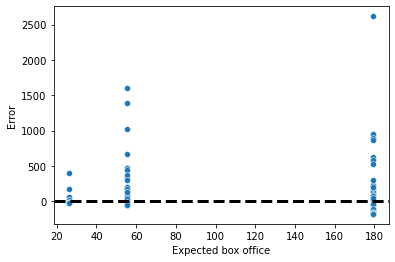

In [50]:
ax = sns.scatterplot(x=box_office_est7.predict(),y=box_office_est7.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected box office',ylabel='Error');

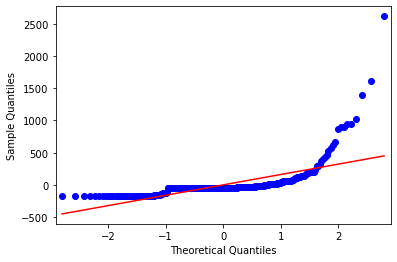

In [51]:
sm.qqplot(box_office_est7.resid,line='r');

In [52]:
box_office_robust7 = box_office_est7.get_robustcov_results(cov_type='HC3') 
box_office_robust7.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,179.3931,41.750,4.297,0.000,97.306,261.480
C(movie_length_type)[T.normal],-124.2138,43.129,-2.880,0.004,-209.012,-39.415
C(movie_length_type)[T.short],-153.2694,43.564,-3.518,0.000,-238.923,-67.616


Here I study the correlation between world box office and a non-binary catigorical variable, movie length. First I make a dummy ols and found that all dummy coefficients are significant. Second, I make a residual plot and qqplot to diagnose whether the model comply with the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed. Based on the plots, we can see that: 1) the estimated errors are dispersed; 2) the estimated error doesn't lie on the straight line in qqplot. Therefore, the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed is problematic, and I choose to use robust 95% confidence interval to modify the original model.

From the robust result we can see that all coefficients are significant. The intercept 179.3931 means that when the movie is a long movie(>120), the expected world box office of the movie is 179.3931 million US dollars. The coefficient -124.2138 is the difference between expected world box office of long movie and normal length movie. When the movie length is normal(>=90,<=120), the expected world box office is 124.2138 million US dollars less than long movies. The coefficient -153.2694 is the difference between expected world box office of long movie and short length movie. When the movie length is short(<90), the expected world box office is 153.2694 million US dollars less than long movies.

#### (6) polynomial

Add polynomial into the models is an approach to deal with non-linear correlation. Most of models I run above have problem with the assumption that 𝑆𝐷(𝜖𝑖)=𝜎 and the error 𝜖𝑖 are normally distributed, and I test all the models with polynomial and find out one model is suitable to use polynomial to modify. Other models have insignificant coefficient of polynomial or insignificant coefficient of linear term after I add the polynomial. 

1. `world box office - budget + budget**3`

In [53]:
box_office_est_polynomial = ols('gross_world_USD_Million~budget_USD_Million+I(budget_USD_Million**3)'
                            ,data=world_budget_exist).fit() 
box_office_polynomial_robust = box_office_est_polynomial.get_robustcov_results(cov_type='HC3') 
box_office_polynomial_robust.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,18.0724,15.685,1.152,0.251,-12.875,49.020
budget_USD_Million,2.3881,0.776,3.078,0.002,0.857,3.919
I(budget_USD_Million ** 3),3.964e-05,1.54e-05,2.578,0.011,9.3e-06,7e-05


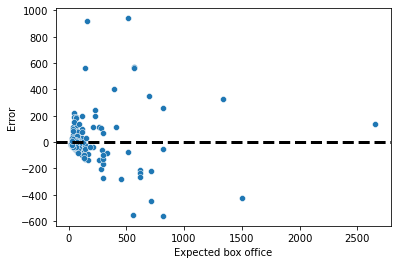

In [54]:
ax = sns.scatterplot(x=box_office_est_polynomial.predict(),y=box_office_est_polynomial.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected box office',ylabel='Error');

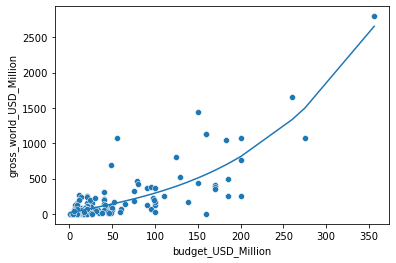

In [55]:
ax = sns.scatterplot(data=world_budget_exist,x='budget_USD_Million',y='gross_world_USD_Million')
ax = sns.lineplot(data=world_budget_exist,x='budget_USD_Million',y=box_office_est_polynomial.predict())

Based on the robust result, the polynomial term and linear term are both significant. What's more, after including the polynomial term `budget_USD_Million**3`, the residual plot of the model looks much better than before and the regression line fits data points better. 

#### (7) Log

Taking the log is a good way to deal with heteroscedasticity, especially when the dimensions of quantity are different in the variables. For instance, the world box office of different movies can be very large and the effect of rating on movies with different world box office can vary. In this case, we can use log to modify our model. Also, using log is a good way to observe data with large magnitude, as it transforms the change into percentage. Based on the heteroscedasticity problems revealed in my models and the advantages of log, I can take log of both dependent and independent variables in many of my models. The following are some examples.

1. `log(world box office) - log(rating)`

In [56]:
box_office_est_log = ols('np.log(gross_world_USD_Million)~np.log(rating_10_scale)',data=imdb_worldwide_gross_exist).fit() 
box_office_log_robust = box_office_est_log.get_robustcov_results(cov_type='HC3') 
box_office_log_robust.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-8.5051,1.807,-4.708,0.000,-12.057,-4.953
np.log(rating_10_scale),5.3209,0.973,5.469,0.000,3.408,7.234


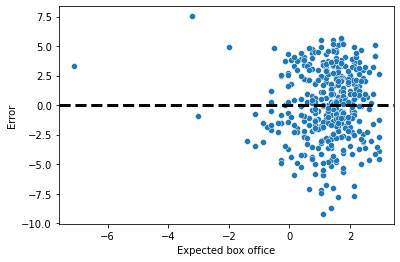

In [57]:
ax = sns.scatterplot(x=box_office_est_log.predict(),y=box_office_est_log.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected box office',ylabel='Error');

We can see that the coefficient is significant and the residual plot looks so much better than before. Now the coefficient means that when rating increases 1%, the world box office will increase 5.32%.

2. `log(world box office) - log(budget)`

In [58]:
box_office_est_log2 = ols('np.log(gross_world_USD_Million)~np.log(budget_USD_Million)',data=world_budget_exist).fit() 
box_office_log_robust2 = box_office_est_log2.get_robustcov_results(cov_type='HC3') 
box_office_log_robust2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.1534,0.445,-2.593,0.010,-2.031,-0.276
np.log(budget_USD_Million),1.4485,0.122,11.873,0.000,1.208,1.689


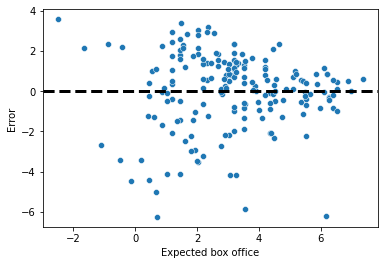

In [59]:
ax = sns.scatterplot(x=box_office_est_log2.predict(),y=box_office_est_log2.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected box office',ylabel='Error');

The coefficient is significant and the residual plot looks better than before. Now the coefficient means that when budget increases 1%, the world box office will increase 1.4485%. This provides us a new vision to look at their relation.

3. `log(world box office) - log(opening week box office) + score binary`

In [60]:
box_office_est_log3 = ols('np.log(gross_world_USD_Million)~np.log(opening_week_gross_USD_Million)+High_low_score',
                      data=world_opening_control).fit() 
box_office_log_robust3 = box_office_est_log3.get_robustcov_results(cov_type='HC3') 
box_office_log_robust3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.4472,0.109,22.526,0.000,2.233,2.661
np.log(opening_week_gross_USD_Million),0.6840,0.036,18.960,0.000,0.613,0.755
High_low_score,1.3481,0.209,6.465,0.000,0.937,1.759


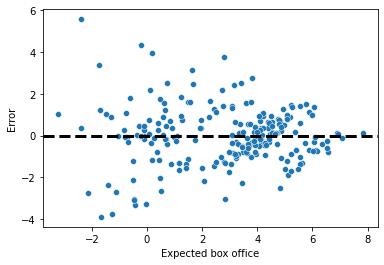

In [61]:
ax = sns.scatterplot(x=box_office_est_log3.predict(),y=box_office_est_log3.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected box office',ylabel='Error');

The coefficients are significant and the residual plot looks better. Now the coefficient 0.684 means that when the score is controlled, when opening week box office increases 1%, the world box office will increase 0.684%. The coefficient 1.3481 means that when opening week box office is controlled for, the expected box office of high score movies will be 134.81% higher than the expected box office of low score movies.

4. `log(world box office) - log(opening week box office) + score binary + log(opening week box office)*score binary`

In [62]:
box_office_est_log4 = ols('np.log(gross_world_USD_Million)~np.log(opening_week_gross_USD_Million)+High_low_score+ \
                      np.log(opening_week_gross_USD_Million)*High_low_score', data=world_opening_control).fit() 
box_office_log_robust4 = box_office_est_log4.get_robustcov_results(cov_type='HC3') 
box_office_log_robust4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.4439,0.108,22.688,0.000,2.232,2.656
np.log(opening_week_gross_USD_Million),0.7582,0.045,16.719,0.000,0.669,0.848
High_low_score,1.3219,0.193,6.852,0.000,0.942,1.702
np.log(opening_week_gross_USD_Million):High_low_score,-0.2644,0.066,-3.980,0.000,-0.395,-0.133


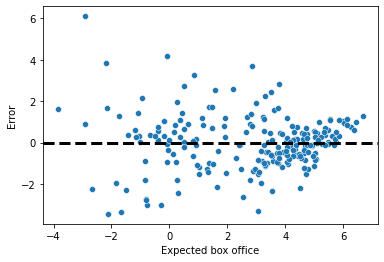

In [63]:
ax = sns.scatterplot(x=box_office_est_log4.predict(),y=box_office_est_log4.resid) 
ax.axhline(color='black',linestyle='--',linewidth=3) 
ax.set(xlabel='Expected box office',ylabel='Error');

The coefficients are significant and the residual plot also looks better. Now the coefficient 0.7582 means that when the score is low, when opening week box office increases 1%, the world box office will increase 0.7582%. The coefficient of interaction term -0.2644 means that when the score is high, when opening week box office increases 1%, the world box office will increase 0.7582%-0.2644%=0.4938%.